In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import matplotlib.image as mpimg
import random
import seaborn as sns
from PIL import Image
sns.set()

### DATA GATHERING

In [3]:
#list the content of the folder
folder_path = 'Danger Of Extinction Annotated'
classes = os.listdir(folder_path)

for item in classes:
    print(item)
print("Number of classes:", len(classes))

buffalo
cheetah
elephant
fox
jaguar
leopard
lion
panda
rhino
zebra
Number of classes: 10


In [9]:
images = len(glob.glob(os.path.join(folder_path, '*', '*.jpg')))
text = len(glob.glob(os.path.join(folder_path, '*', '*.txt')))
print("Total Number of Images:", images)
print("Total Number of Text_file:", text)

Total Number of Images: 2308
Total Number of Text_file: 2309


        OBSERVATION: From the Above output, we have 10 classes of Animal and 2308 images with 2309 annotated text.

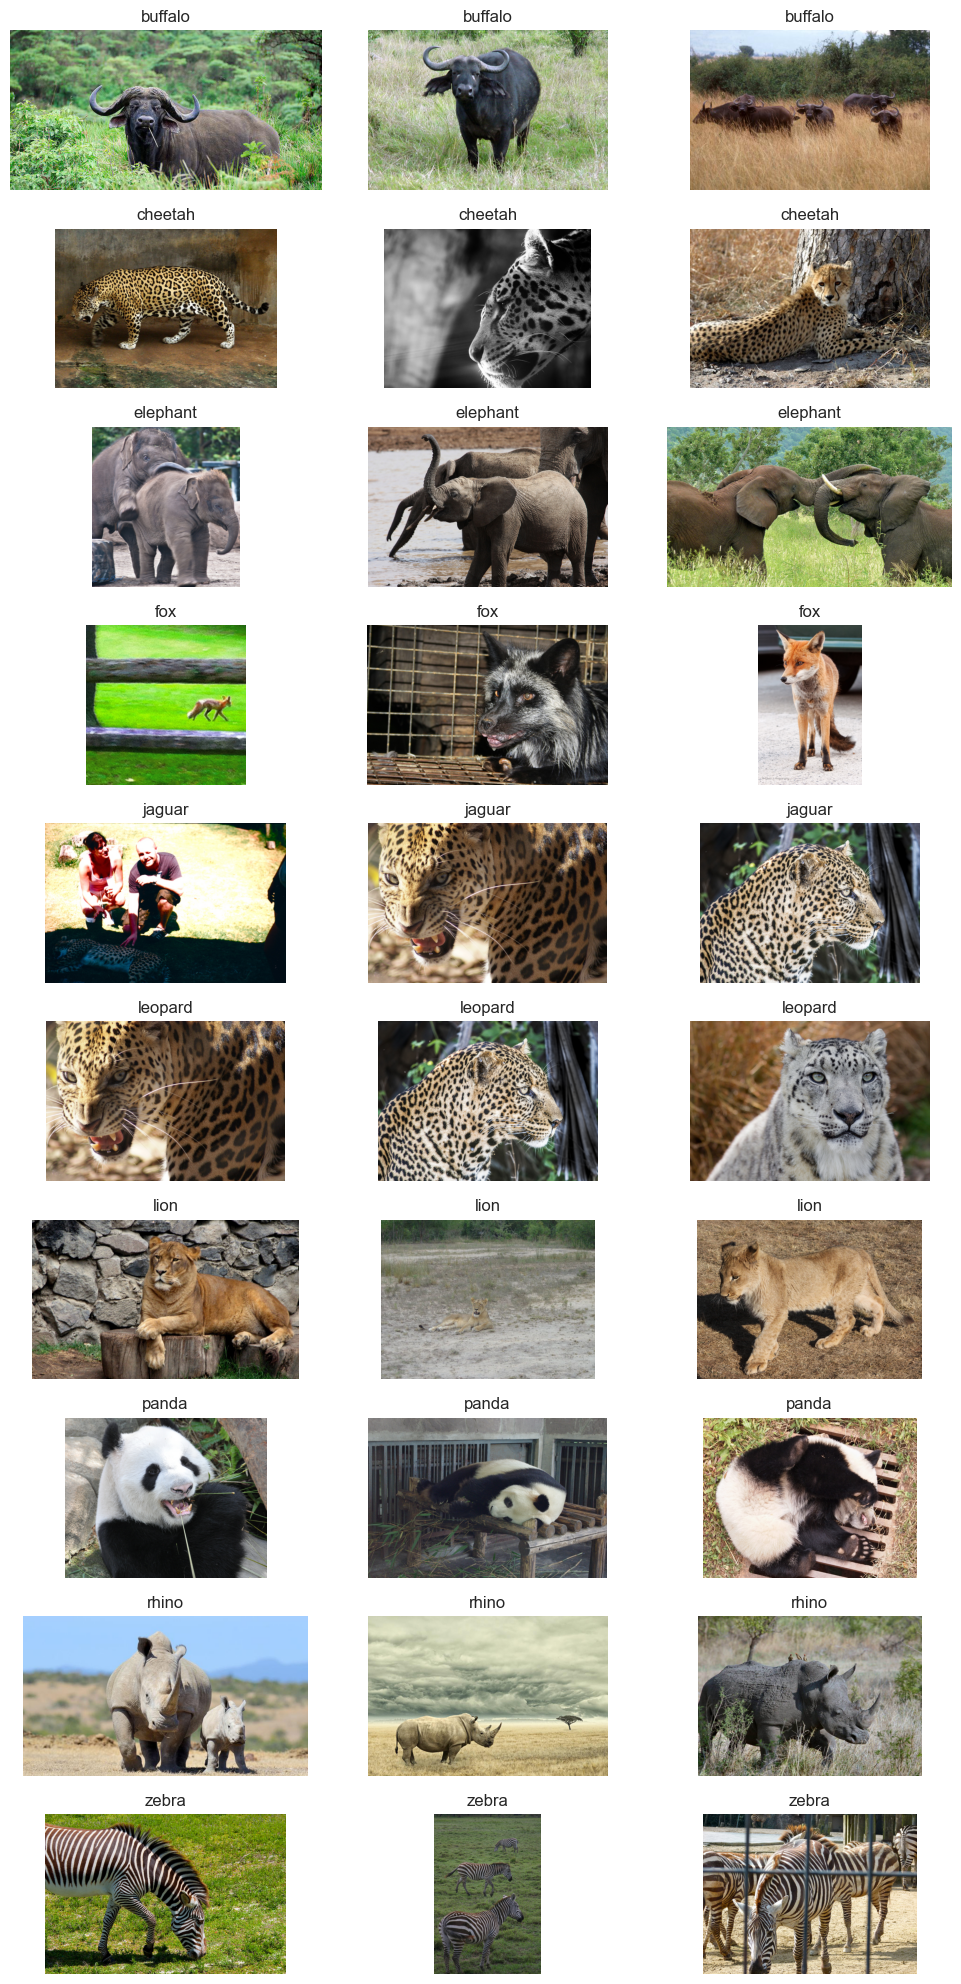

In [5]:
# Display a sample image of each class
#set up a subplots
rows = 10
cols = 3 #to display 3 images from each classes
fig, axes = plt.subplots(rows, cols, figsize=(10, 20))


for i, class_ in enumerate(classes):
    class_path = os.path.join(folder_path, class_)
    images = [image_name for image_name in os.listdir(class_path) if image_name.lower().endswith(('.jpg', '.jpeg', '.png'))][:cols]

    for j, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(class_)
        axes[i, j].axis("off")
    
    
# Fill empty subplots with whitespace
for i in range(len(classes), rows * cols):
    row = i // cols
    col = i % cols
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [10]:
#extract the text files
#initialize empty list
text_data = []
text_data2 = []
label = []

for class_ in classes:
    class_path = os.path.join(folder_path, class_)
    text = [text for text in os.listdir(class_path) if text.lower().endswith('.txt')]
    
    for text_name in text:
        text_path = os.path.join(class_path, text_name)
        
        with open(text_path, 'r') as text_file:
            content = text_file.read()
        
           
        text_data.append(text_name)
        text_data2.append(content)
        label.append(class_)
        
dict_2 = {'Class_labels': label, 'Text_file': text_data, 'Text': text_data2}
df1 = pd.DataFrame(dict_2)
pd.set_option('display.max_rows', 500)
df1.head()

,Class_labels,Text_file,Text
0,buffalo,001.txt,0 0.560000 0.663017 0.617500 0.644769
1,buffalo,002.txt,0 0.473515 0.508434 0.497592 0.838554
2,buffalo,003.txt,0 0.819167 0.593750 0.148333 0.242500\n0 0.747...
3,buffalo,004.txt,0 0.386719 0.612225 0.506771 0.653295
4,buffalo,005.txt,0 0.238000 0.568513 0.224000 0.244898\n0 0.530...


###                Exploratory Data Analysis

In [14]:
#to get number of images in each classes

#initialize an empty list
class_data = []
Num_images = []

for class_ in classes:
    class_path = os.path.join(folder_path, class_)
    images = [image for image in os.listdir(class_path) if image.lower().endswith(('.jpg', '.jpeg', '.png'))]
    num_images = len(images)
    
    class_data.append(class_)
    Num_images.append(num_images)
#create a dictionary and convert to dataframe    
dict_ = {'Class_label':class_data, 'Num_images':Num_images}
df = pd.DataFrame(dict_)
df

,Class_label,Num_images
0,buffalo,376
1,cheetah,132
2,elephant,376
3,fox,150
4,jaguar,100
5,leopard,123
6,lion,208
7,panda,91
8,rhino,376
9,zebra,376


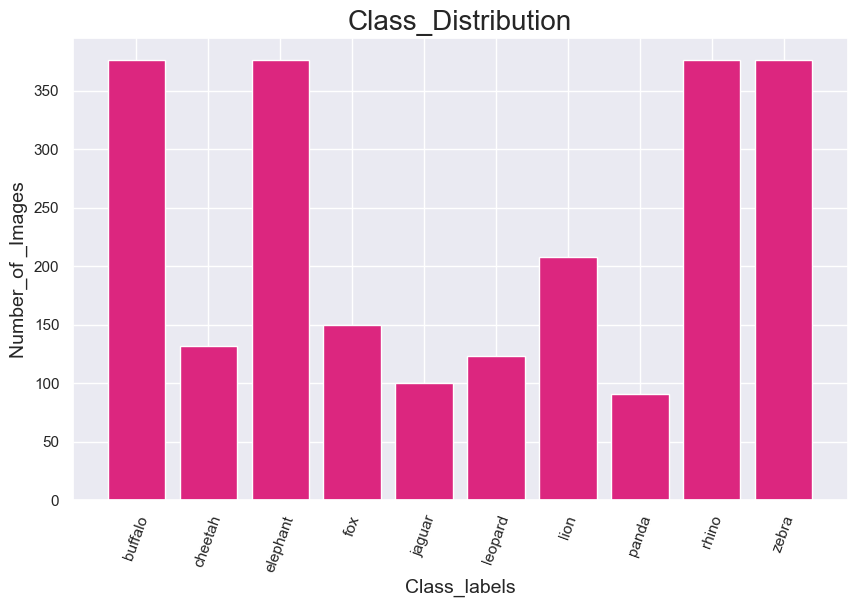

In [7]:
#To get the class distribution using a bar chart

plt.figure(figsize=[10, 6])
plt.bar(df.Class_label, df.Num_images, color= '#DC267F')
plt.xlabel('Class_labels', fontsize = 14)
plt.ylabel('Number_of _Images', fontsize = 14)
plt.title('Class_Distribution', fontsize = 20)
plt.xticks(rotation =  70)
plt.show()

In [8]:
#Image size Analysis

image_sizes = []
for j, class_ in enumerate (classes):
    class_path = os.path.join(folder_path, class_)
    images = [image_name for image_name in os.listdir(class_path) if image_name.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for i, image_name in enumerate(images):
        image_path = os.path.join(class_path, image_name)
        image = Image.open(image_path)
        image_sizes.append({'Class_label': class_, 'Image': image_name, 'Width': image.width, 'Height': image.height})

df_sizes = pd.DataFrame(image_sizes)
df_sizes.head()

,Class_label,Image,Width,Height
0,buffalo,001.jpg,800,411
1,buffalo,002.jpg,623,415
2,buffalo,003.jpg,600,400
3,buffalo,004.jpg,1920,1047
4,buffalo,005.jpg,500,343


In [16]:
#summary statistics of the image sizes
df_sizes.describe()

,Width,Height
count,2308.000000,2308.000000
mean,899.481369,654.000000
std,493.658193,351.616062
min,99.000000,86.000000
25%,640.000000,427.000000
50%,900.000000,640.000000
75%,1024.000000,768.000000
max,4500.000000,3888.000000
